In [1]:
! pip install chembl_webresource_client

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
# Target search for aromatase
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cytochrome P450 19A1,19.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Rattus norvegicus,Cytochrome P450 19A1,19.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
     

In [6]:
ARO = pd.DataFrame.from_dict(res)

In [7]:
ARO

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670103,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.203
4335,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670104,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.043
4336,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670105,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.001
4337,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670106,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.014


In [8]:
ARO.type.unique()

array(['IC50', 'I50', 'Log IC50', 'pIC50'], dtype=object)

In [9]:
ARO.to_csv('aromatase_02_bioactivity_data_raw.csv', index=False)

In [10]:
ARO2 = ARO[ARO.standard_value.notna()]
ARO2 = ARO2[ARO.canonical_smiles.notna()]
ARO2

C:\Users\HP\AppData\Local\Temp\ipykernel_13340\805638284.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ARO2 = ARO2[ARO.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670103,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.203
4335,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670104,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.043
4336,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670105,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.001
4337,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670106,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376056,Inhibition of aromatase in human placental mic...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,0.014


In [11]:

len(ARO2.canonical_smiles.unique())

3068

In [12]:
ARO2_nr = ARO2.drop_duplicates(['canonical_smiles'])
ARO2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670024,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376029,Inhibition of human aromatase using ASD as sub...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,4.629
4278,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670025,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376029,Inhibition of human aromatase using ASD as sub...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,4.796
4279,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670026,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376029,Inhibition of human aromatase using ASD as sub...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,5.509
4320,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25670075,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5376049,Inhibition of human recombinant aromatase in J...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,8.154


In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
ARO3 = ARO2_nr[selection]
ARO3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
4277,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,23496.33
4278,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,15995.58
4279,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3097.42
4320,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015


In [14]:
ARO3.to_csv('aromatase_03_bioactivity_data_preprocessed.csv', index=False)

In [15]:
ARO4 = pd.read_csv('aromatase_03_bioactivity_data_preprocessed.csv')

In [16]:
bioactivity_threshold = []
for i in ARO4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
ARO5 = pd.concat([ARO4, bioactivity_class], axis=1)
ARO5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active
...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03,intermediate
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active


In [18]:
ARO5.to_csv('aromatase_04_bioactivity_data_curated.csv', index=False)

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('aromatase_04_bioactivity_data_curated.csv')

In [21]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active


In [22]:
# To Calculate Lipinski descriptors

In [23]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [24]:
# Calculate descriptors

In [25]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

df_lipinski = lipinski(df.canonical_smiles)

In [26]:
#Combine DataFrames

In [27]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
3063,230.311,3.26600,0.0,3.0
3064,230.311,3.56402,1.0,2.0
3065,231.295,3.82892,0.0,3.0
3066,260.300,2.86508,0.0,4.0


In [28]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active
...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03,intermediate
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active


In [29]:
#combining the 2 DataFrame

In [30]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [31]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive,230.311,3.26600,0.0,3.0
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive,230.311,3.56402,1.0,2.0
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03,intermediate,231.295,3.82892,0.0,3.0
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active,260.300,2.86508,0.0,4.0


In [32]:

df_combined.standard_value.describe()

count    3.068000e+03
mean     6.979407e+05
std      2.424314e+07
min      0.000000e+00
25%      1.199500e+02
50%      1.100000e+03
75%      7.347500e+03
max      9.418896e+08
Name: standard_value, dtype: float64

In [33]:
#Convert IC50 to pIC50

In [34]:
import numpy as np
def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        # Add check to avoid log10(0)
        if molar > 0:
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(float('nan'))  # Use NaN for zero values
        
    input['pIC50'] = pIC50
    
    # Check which columns actually exist before dropping
    columns_to_drop = []
    if 'standard_value' in input.columns:
        columns_to_drop.append('standard_value')
    if 'standard_value_norm' in input.columns:
        columns_to_drop.append('standard_value_norm')
    
    # Only drop if there are columns to drop
    if columns_to_drop:
        x = input.drop(columns=columns_to_drop)
    else:
        x = input
    
    return x




In [35]:
-np.log10( (10**-9)* 100000000 )

1.0

In [36]:
-np.log10( (10**-9)* 10000000000 )
     

-1.0

In [37]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    # Fix: Use axis=1 as a keyword argument instead of positional argument
    x = input.drop('standard_value', axis=1)  # Changed from input.drop('standard_value', 1)
        
    return x

df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7.100000e+03
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,5.000000e+04
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,2.380000e+02
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,5.700000e+01
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,5.400000e+01
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,2.349633e+04
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,1.599558e+04
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,intermediate,231.295,3.82892,0.0,3.0,3.097420e+03
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,7.015000e+00


In [38]:
df_norm.standard_value_norm.describe()

count    3.068000e+03
mean     1.146835e+05
std      3.126583e+06
min      0.000000e+00
25%      1.199500e+02
50%      1.100000e+03
75%      7.347500e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [39]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,4.629000
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,4.796000
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,intermediate,231.295,3.82892,0.0,3.0,5.509000
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,8.153972


In [40]:
df_final.pIC50.describe()

count    3067.000000
mean        6.082736
std         1.328809
min         1.000000
25%         5.133418
50%         5.958607
75%         6.921000
max        10.823909
Name: pIC50, dtype: float64

In [41]:
#Removing the 'intermediate'class
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
3061,CHEMBL151038,CCCCOc1ccc(-c2oncc2C)cc1,active,231.295,3.82892,0.0,3.0,6.319003
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,4.629000
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,4.796000
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,8.153972


In [42]:
print(df.columns.tolist())

['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'class']


In [43]:
# Option 1: Define the function before using it
def process_molecules(dataframe, value_col=None):
    # Add your processing logic here
    # For example:
    processed_df = dataframe.copy()
    # ... processing steps
    return processed_df

# Now use the function
df_processed = process_molecules(df, value_col='standard_value')

# Option 2: Import the function if it's in another module
# from your_module import process_molecules
# df_processed = process_molecules(df, value_col='standard_value')

In [44]:
df_processed

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7.100000e+03,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active
...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,3.097420e+03,intermediate
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active


In [45]:

df_processed.standard_value.describe()

count    3.068000e+03
mean     6.979407e+05
std      2.424314e+07
min      0.000000e+00
25%      1.199500e+02
50%      1.100000e+03
75%      7.347500e+03
max      9.418896e+08
Name: standard_value, dtype: float64

In [46]:
#Removing the 'intermediate' bioactivity class
df_processed = df_processed[df_processed['class'] != 'intermediate']
df_processed

,molecule_chembl_id,canonical_smiles,standard_value,class
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,5.000000e+04,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,2.380000e+02,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,5.700000e+01,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,5.400000e+01,active
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,4.100000e+01,active
...,...,...,...,...
3061,CHEMBL151038,CCCCOc1ccc(-c2oncc2C)cc1,4.797300e+02,active
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,2.349633e+04,inactive
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,1.599558e+04,inactive
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,7.015000e+00,active


In [47]:
#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [48]:
#Import library

In [49]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_13340\89681622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_processed, edgecolor='black', palette=plt_colors)  # <- pass palette


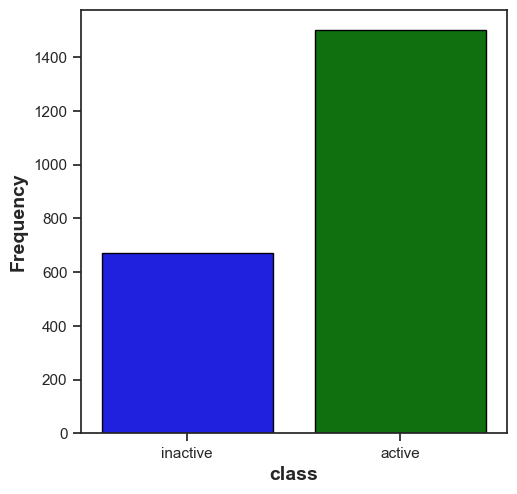

In [50]:
#Frequency plot of the 2 bioactivity classes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

plt_colors = {'active': 'green', 'inactive': 'blue'}

sns.countplot(x='class', data=df_processed, edgecolor='black', palette=plt_colors)  # <- pass palette

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_class.pdf')
plt.show()


In [51]:
#Scatter plot of MW versus LogP


In [53]:
#cleaning up data by Checking for missing or infinite values
print(df_2class[['MW','LogP','pIC50']].isna().sum())
print(np.isinf(df_2class[['MW','LogP','pIC50']]).sum())


MW       0
LogP     0
pIC50    1
dtype: int64
MW       0
LogP     0
pIC50    0
dtype: int64


In [56]:
df_plot = df_2class.dropna(subset=['MW','LogP','pIC50'])           # remove NaNs
df_plot = df_plot[np.isfinite(df_plot['pIC50'])]                      # remove infinite values if any


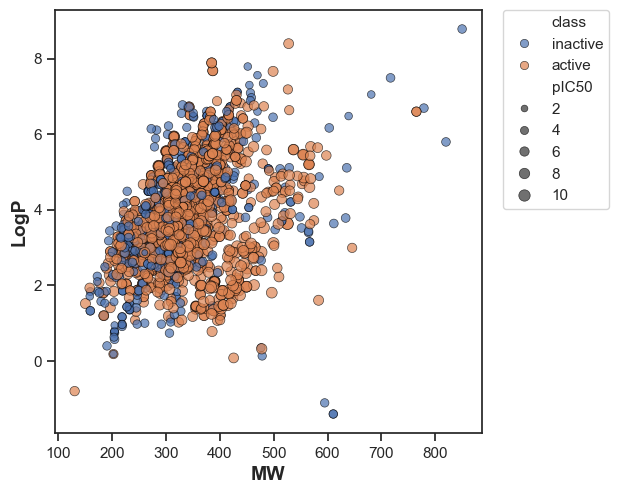

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_plot, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13340\426438219.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='pIC50', data=df_2class, palette=plt_colors)


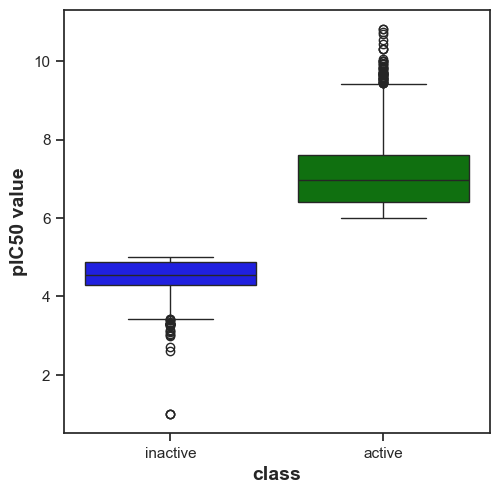

In [59]:
#Box plots
#pIC50 value
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

# Define colors for each class
plt_colors = {'active': 'green', 'inactive': 'blue'}

# Pass the colors using the palette parameter
sns.boxplot(x='class', y='pIC50', data=df_2class, palette=plt_colors)

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')
plt.show()


In [60]:
import pandas as pd
from numpy.random import seed
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, df=df_2class, verbose=False):
    """
    Perform Mann-Whitney U test between 'active' and 'inactive' molecules for a given descriptor.
    Saves results to CSV and returns a DataFrame.
    """

    # Seed for reproducibility
    seed(1)

    # Select only the descriptor and class columns
    df_sel = df[[descriptor, 'class']]

    # Split active and inactive
    active = df_sel[df_sel['class'] == 'active'][descriptor]
    inactive = df_sel[df_sel['class'] == 'inactive'][descriptor]

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive)

    # Interpret results
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # Create results DataFrame
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save to CSV
    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)

    if verbose:
        print(results)

    return results

    

In [61]:
mannwhitney('pIC50', verbose=True)


  Descriptor  Statistics   p  alpha                      Interpretation
0      pIC50         NaN NaN   0.05  Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


C:\Users\HP\AppData\Local\Temp\ipykernel_13340\2892331634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='MW', data=df_2class, palette=plt_colors)


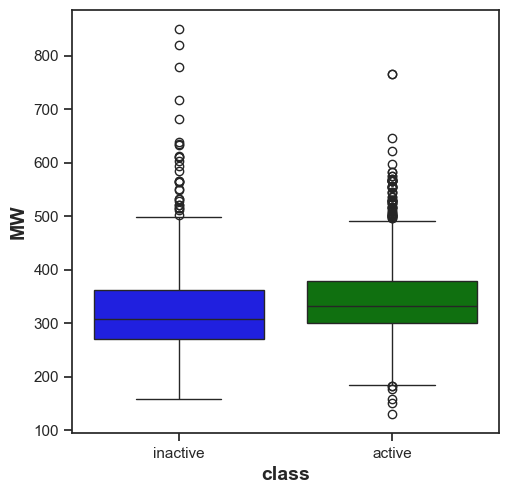

In [62]:
#Box plots
#MW value
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

# Define colors for each class
plt_colors = {'active': 'green', 'inactive': 'blue'}

# Pass the colors using the palette parameter
sns.boxplot(x='class', y='MW', data=df_2class, palette=plt_colors)

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')
plt.show()

In [63]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,602249.0,2.757588e-13,0.05,Different distribution (reject H0)


C:\Users\HP\AppData\Local\Temp\ipykernel_13340\2975863092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='LogP', data=df_2class, palette=plt_colors)


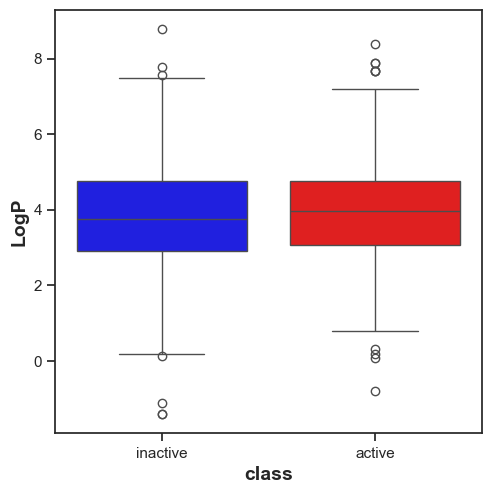

In [64]:
#Box plots
#LogP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

# Define colors for each class
plt_colors = {'active': 'red', 'inactive': 'blue'}

# Pass the colors using the palette parameter
sns.boxplot(x='class', y='LogP', data=df_2class, palette=plt_colors)

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')
plt.show()

In [65]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,531551.0,0.038384,0.05,Different distribution (reject H0)


C:\Users\HP\AppData\Local\Temp\ipykernel_13340\647814958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='NumHDonors', data=df_2class, palette=plt_colors)


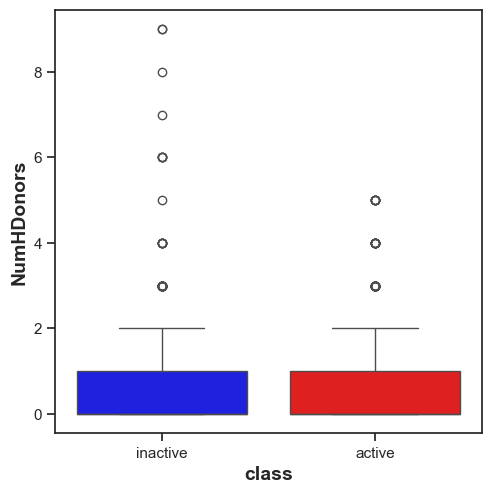

In [66]:
#Box plots
#NumHDonors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

# Define colors for each class
plt_colors = {'active': 'red', 'inactive': 'blue'}

# Pass the colors using the palette parameter
sns.boxplot(x='class', y='NumHDonors', data=df_2class, palette=plt_colors)

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')
plt.show()

In [67]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,455964.0,0.00007,0.05,Different distribution (reject H0)


C:\Users\HP\AppData\Local\Temp\ipykernel_13340\1029819351.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='NumHAcceptors', data=df_2class, palette=plt_colors)


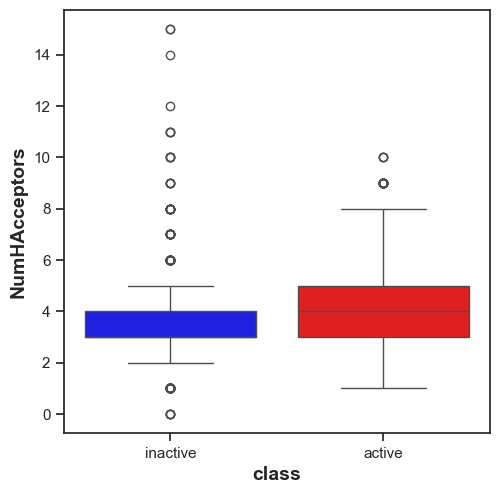

In [69]:
#Box plots
#NumHAcceptors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

# Define colors for each class
plt_colors = {'active': 'red', 'inactive': 'blue'}

# Pass the colors using the palette parameter
sns.boxplot(x='class', y='NumHAcceptors', data=df_2class, palette=plt_colors)

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')
plt.show()

In [70]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,561525.0,0.000012,0.05,Different distribution (reject H0)
